In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
sc_collage_df = pd.read_csv("data/social_capital_college.csv")
sc_county_df = pd.read_csv("data/social_capital_county.csv")
sc_high_school_df = pd.read_csv("data/social_capital_high_school.csv")
sc_zip_df = pd.read_csv("data/social_capital_zip.csv")
print("Number of samples for each data set:")
print(f"  social_capital_college: {sc_collage_df.shape[0]},")
print(f"  social_capital_county: {sc_county_df.shape[0]},")
print(f"  social_capital_high_school: {sc_high_school_df.shape[0]},")
print(f"  social_capital_zip: {sc_zip_df.shape[0]}.")

Number of samples for each data set:
  social_capital_college: 2586,
  social_capital_county: 3089,
  social_capital_high_school: 17525,
  social_capital_zip: 23028,


Histogram for 'ec_grp_mem_zip':


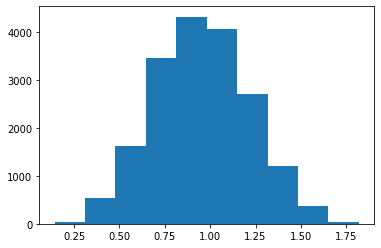

Statistics for 'ec_grp_mem_zip':
 - number of not NaN samples: 18337,
 - maximum likelihood estimate for mean: 0.955,
 - maximum likelihood estimate for variance: 0.068.


In [54]:
ec_grp_mem_zip = sc_zip_df[["ec_grp_mem_zip"]]
ec_grp_mem_zip = np.array(ec_grp_mem_zip.values).reshape(-1)
ec_grp_mem_zip_cleaned = ec_grp_mem_zip[~np.isnan(ec_grp_mem_zip)]
print("Histogram for 'ec_grp_mem_zip':")
nbhd_exposure_zip_hist = np.hstack(ec_grp_mem_zip_cleaned)
plt.hist(nbhd_exposure_zip_hist)
plt.show()
ec_grp_mem_zip_mean_mle = ec_grp_mem_zip_cleaned.sum() / ec_grp_mem_zip_cleaned.shape[0]
ec_grp_mem_zip_variance_mle = ((ec_grp_mem_zip_cleaned - ec_grp_mem_zip_mean_mle) ** 2).sum() / ec_grp_mem_zip_cleaned.shape[0]
print("Statistics for 'ec_grp_mem_zip':")
print(f" - number of not NaN samples: {ec_grp_mem_zip_cleaned.shape[0]},") 
print(f" - maximum likelihood estimate for mean: {ec_grp_mem_zip_mean_mle:.3f},")
print(f" - maximum likelihood estimate for variance: {ec_grp_mem_zip_variance_mle:.3f}.")


Histogram for 'ec_grp_mem_zip':


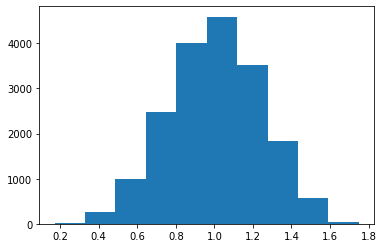

Statistics for 'exposure_grp_mem_zip':
- number of not NaN samples: 18337,
- maximum likelihood estimate for mean: 1.005,
- maximum likelihood estimate for variance: 0.057.


In [55]:
exposure_grp_mem_zip = sc_zip_df[["exposure_grp_mem_zip"]]
exposure_grp_mem_zip = np.array(exposure_grp_mem_zip.values).reshape(-1)
exposure_grp_mem_zip_cleaned = exposure_grp_mem_zip[~np.isnan(exposure_grp_mem_zip)]
print("Histogram for 'ec_grp_mem_zip':")
nbhd_exposure_zip_hist = np.hstack(exposure_grp_mem_zip_cleaned)
plt.hist(nbhd_exposure_zip_hist)
plt.show()
exposure_grp_mem_zip_mean_mle = exposure_grp_mem_zip_cleaned.sum() / exposure_grp_mem_zip_cleaned.shape[0]
exposure_grp_mem_zip_variance_mle = ((exposure_grp_mem_zip_cleaned - exposure_grp_mem_zip_mean_mle) ** 2).sum() / exposure_grp_mem_zip_cleaned.shape[0]
print("Statistics for 'exposure_grp_mem_zip':")
print(f"- number of not NaN samples: {exposure_grp_mem_zip_cleaned.shape[0]},") 
print(f"- maximum likelihood estimate for mean: {exposure_grp_mem_zip_mean_mle:.3f},")
print(f"- maximum likelihood estimate for variance: {exposure_grp_mem_zip_variance_mle:.3f}.")

Histogram for 'nbhd_exposure_zip':


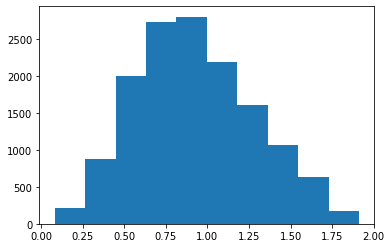

Statistics for 'nbhd_exposure_zip':
- number of not NaN samples: 14285,
- maximum likelihood estimate for mean: 0.929,
- maximum likelihood estimate for variance: 0.125.


In [56]:
nbhd_exposure_zip = sc_zip_df[["nbhd_exposure_zip"]]
nbhd_exposure_zip = np.array(nbhd_exposure_zip.values).reshape(-1)
nbhd_exposure_zip_cleaned = nbhd_exposure_zip[~np.isnan(nbhd_exposure_zip)]
nbhd_exposure_zip_hist = np.hstack(nbhd_exposure_zip_cleaned)
print("Histogram for 'nbhd_exposure_zip':")
plt.hist(nbhd_exposure_zip_hist)
plt.show()
nbhd_exposure_zip_mean_mle = nbhd_exposure_zip_cleaned.sum() / nbhd_exposure_zip_cleaned.shape[0]
nbhd_exposure_zip_variance_mle = ((nbhd_exposure_zip_cleaned - nbhd_exposure_zip_mean_mle) ** 2).sum() / nbhd_exposure_zip_cleaned.shape[0]
print("Statistics for 'nbhd_exposure_zip':")
print(f"- number of not NaN samples: {nbhd_exposure_zip_cleaned.shape[0]},") 
print(f"- maximum likelihood estimate for mean: {nbhd_exposure_zip_mean_mle:.3f},")
print(f"- maximum likelihood estimate for variance: {nbhd_exposure_zip_variance_mle:.3f}.")

In [57]:
selected_cols = sc_zip_df[["ec_grp_mem_zip", "exposure_grp_mem_zip", "nbhd_exposure_zip"]]
print("Correlation between chosen columns:")
selected_cols.corr()

Correlation between chosen columns:


,ec_grp_mem_zip,exposure_grp_mem_zip,nbhd_exposure_zip
ec_grp_mem_zip,1.000000,0.967315,0.908673
exposure_grp_mem_zip,0.967315,1.000000,0.924254
nbhd_exposure_zip,0.908673,0.924254,1.000000
